# PARAS (TASK 2: To Explore Supervised Machine Learning)

## Objective: To predict the percentage of marks that a student is expected to score based upon the number of hours they studied

In [2]:
# Importing libraries
import pandas as pd
import statistics as st
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
from scipy import stats

In [3]:
# Reading the data
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [4]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Statistics of the dataset

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#correlation
corr=data.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Data visualization

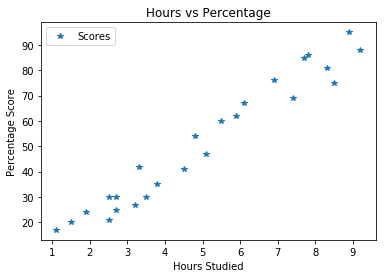

In [7]:
# Scatter plot for Hours vs. Scores
data.plot(x='Hours', y='Scores',style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

###### Above graphes shows that percentage score and hours studied are linear

## Data Preparation

In [8]:
# Dividing the data into "attributes" (inputs) and "labels" (outputs)
x=data.iloc[:,:-1].values  
y=data.iloc[:,1].values

In [9]:
# Splitting this data into training and test sets
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Training the Model

In [10]:
# Fitting a linear regression model
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### Plotting Regression Line

<function matplotlib.pyplot.show>

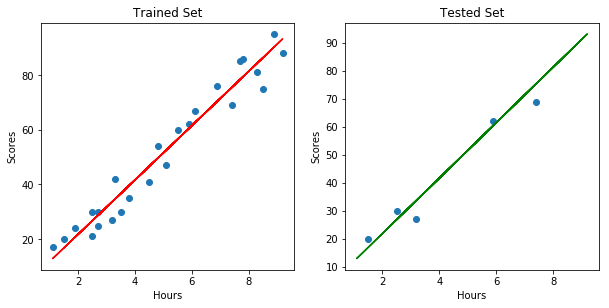

In [11]:
f =plt.figure(figsize =(10,10))
mx=plt.subplot(221)
mx1=plt.subplot(222)
line=model.coef_*x+model.intercept_
mx.scatter(x,y)
mx.plot(x,line,c='red')
plt.show
mx.set_title('Trained Set')
mx.set_xlabel('Hours')
mx.set_ylabel('Scores')
mx1.scatter(X_test,Y_test)
mx1.plot(X_train,model.predict(X_train),c="green")
mx1.set_title('Tested Set')
mx1.set_xlabel('Hours')
mx1.set_ylabel('Scores')
plt.show

## Model Prediction

In [12]:
#Comapring Observed and Predicted values
Y_pred=model.predict(X_test)
df=pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0,0.5,'Scores')

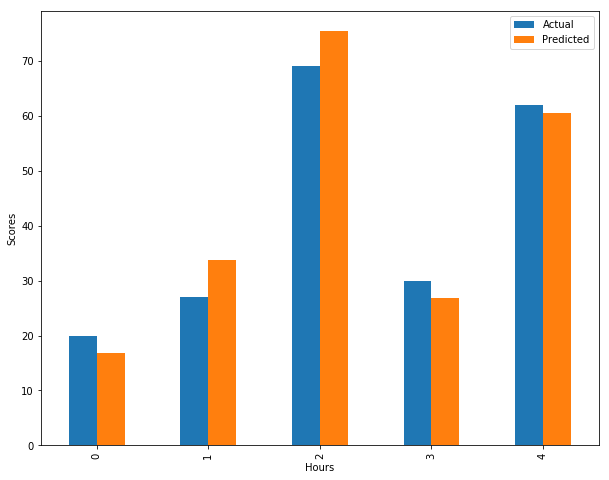

In [13]:
# Plotting the prediction with actual values
df.plot(kind ='bar',figsize=(10,8))
plt.xlabel('Hours')  
plt.ylabel('Scores')

### Predicting own score of a student according to the hours studied

In [14]:
hrs=float(input('Enter no. of hours:'))
own_score=model.predict([[hrs]])
print("Number of Hours = {}".format(hrs))
print("Predicted Score is = {}".format(own_score[0]))

Enter no. of hours:9.5
Number of Hours = 9.5
Predicted Score is = 96.16939660753593


## Model Performance

In [15]:
#R-square value
slope,intercept,r,p,std_err=stats.linregress(Y_test,Y_pred)
print('R-Squared error:',r)

R-Squared error: 0.9806835759589492


### 98% of data fits the model